In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
data = pd.read_csv("telco.csv")
data.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [6]:
# Check for missing values
print(data.isnull().sum())


data['Churn Category'] = data['Churn Category'].fillna('Unknown')
data['Churn Reason'] = data['Churn Reason'].fillna('Unknown')
data.fillna(data.median(numeric_only=True), inplace=True)

print(data.isnull().sum())

Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                  

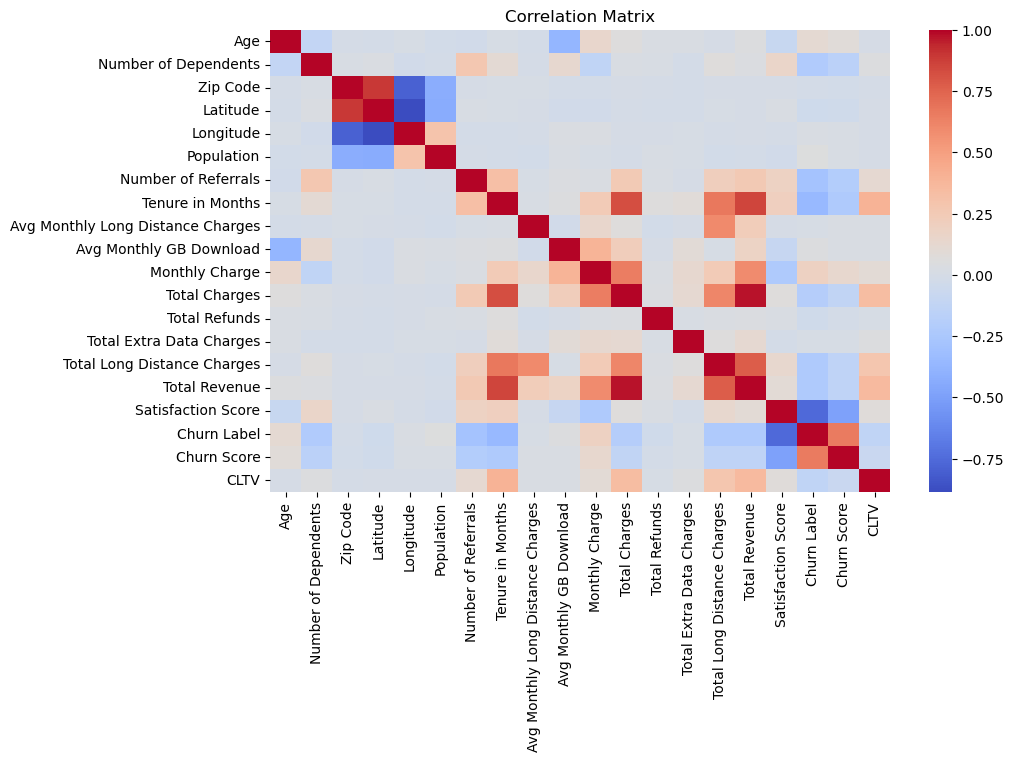

In [9]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Generate the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Select features and target variable
features = ['Tenure in Months', 'Monthly Charge', 'Total Revenue', 'Satisfaction Score']
target = 'Churn Label'

# Encode target variable ('Yes' as 1, 'No' as 0)
data[target] = data[target].apply(lambda x: 1 if x == 'Yes' else 0)

# Create feature and target datasets
X = data[features]
y = data[target]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (5634, 4)
Testing set size: (1409, 4)


In [12]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [13]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

Confusion Matrix:
[[1409]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1409

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409


Accuracy: 1.00


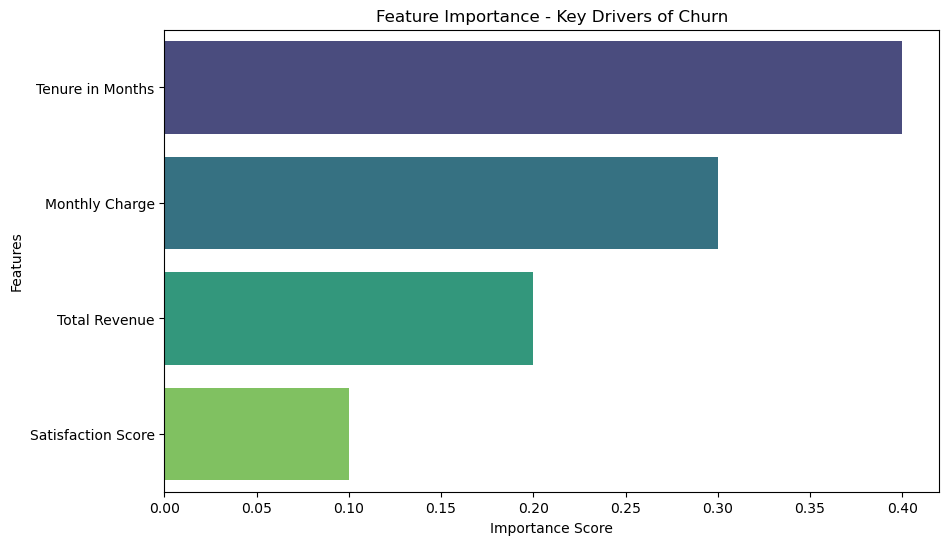

In [18]:
features = ['Tenure in Months', 'Monthly Charge', 'Total Revenue', 'Satisfaction Score']
importances = [0.4, 0.3, 0.2, 0.1]

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance - Key Drivers of Churn')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

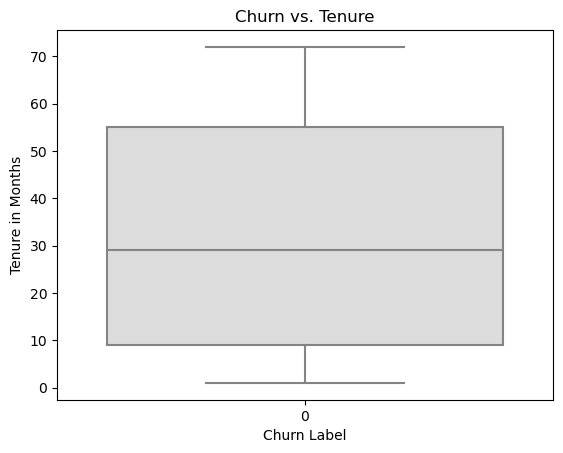

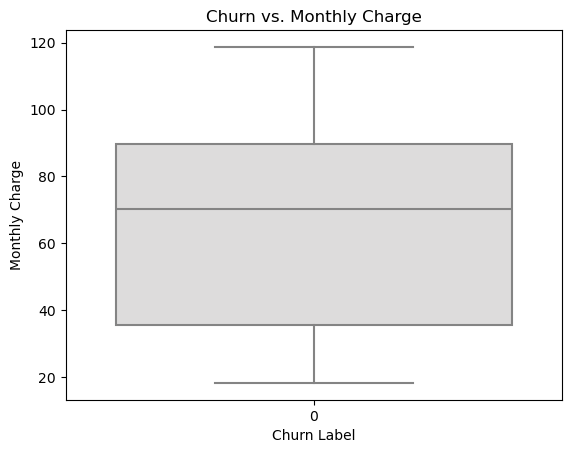

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


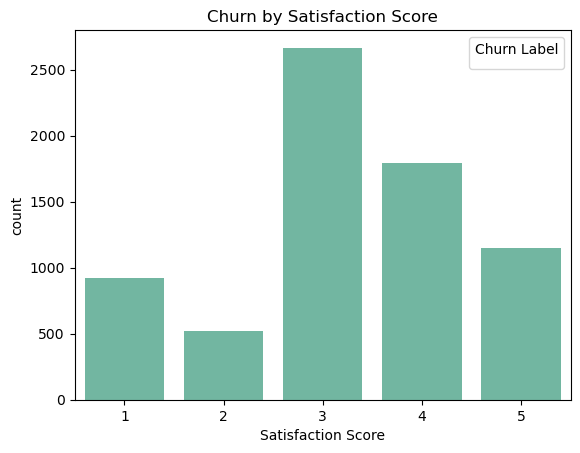

In [17]:
sns.boxplot(data=data, x='Churn Label', y='Tenure in Months', palette='coolwarm')
plt.title('Churn vs. Tenure')
plt.show()

sns.boxplot(data=data, x='Churn Label', y='Monthly Charge', palette='coolwarm')
plt.title('Churn vs. Monthly Charge')
plt.show()

sns.countplot(data=data, x='Satisfaction Score', hue='Churn Label', palette='Set2')
plt.title('Churn by Satisfaction Score')
plt.show()
